<a href="https://colab.research.google.com/github/DrDAN6770/DataSciense-with-Python/blob/main/%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8%E5%B7%A5%E5%85%B7%E7%AE%B1/%E7%A4%BE%E7%BE%A4%E5%85%B1%E5%AD%B8/Red%20Wine%20QualityRed/WineQuality04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 專案收尾

# 結論
---
1. 資料集
    1. 該資料集出現的品質從3~8，呈現常態分佈 (總範圍 0 ~ 10)
    2. fixed acidity、residual sugar、density、PH 對quality沒甚麼影響力
    3. 多數特徵有大量離群值
    4. 該資料集無缺失值
    5. 有重複資料
2. Baseline Model
    1. 透過二分法將quality分為1(好), 0(壞)
    2. 建立RandomForestClassifier模型、交叉驗證
    3. 測試test data
    4. 測試其他模型(LogisticRegression, DecisionTreeClassifier, SVC)
3. 特徵工程、數據標準化
    1. 標準化
    2. 新增欄位游離二氧化硫濃度mso2
    3. 刪除不必要的欄位(後來決定不刪除)
    4. 隨機森林模型超參數調整(rfc_opt)
    5. 測試其他模型(Log、SVC、DTC、XGB)
    5. DeepLearning - Pytorch

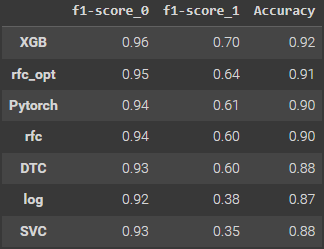

# 套件、資料集載入

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv')

1. fixed acidity : 固定酸度、不易揮發
2. volatile acidity : 乙酸含量、揮發性酸
3. citric acid	: 檸檬酸
4. residual sugar : 殘糖量，揮發後剩餘的糖量
5. chlorides : 酒中含鹽量
6. free sulfur dioxide : 游離SO2，防止微生物生長、酒氧化
7. total sulfur dioxide : 總SO2
8. density : 密度
9. pH : 酸鹼值
10. sulphates : 硫酸鹽
11. alcohol : 酒精度
12. quality : 品質

# 觀察資料及 & 視覺化

## 統計觀察

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 品質分佈情況

In [ ]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [ ]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

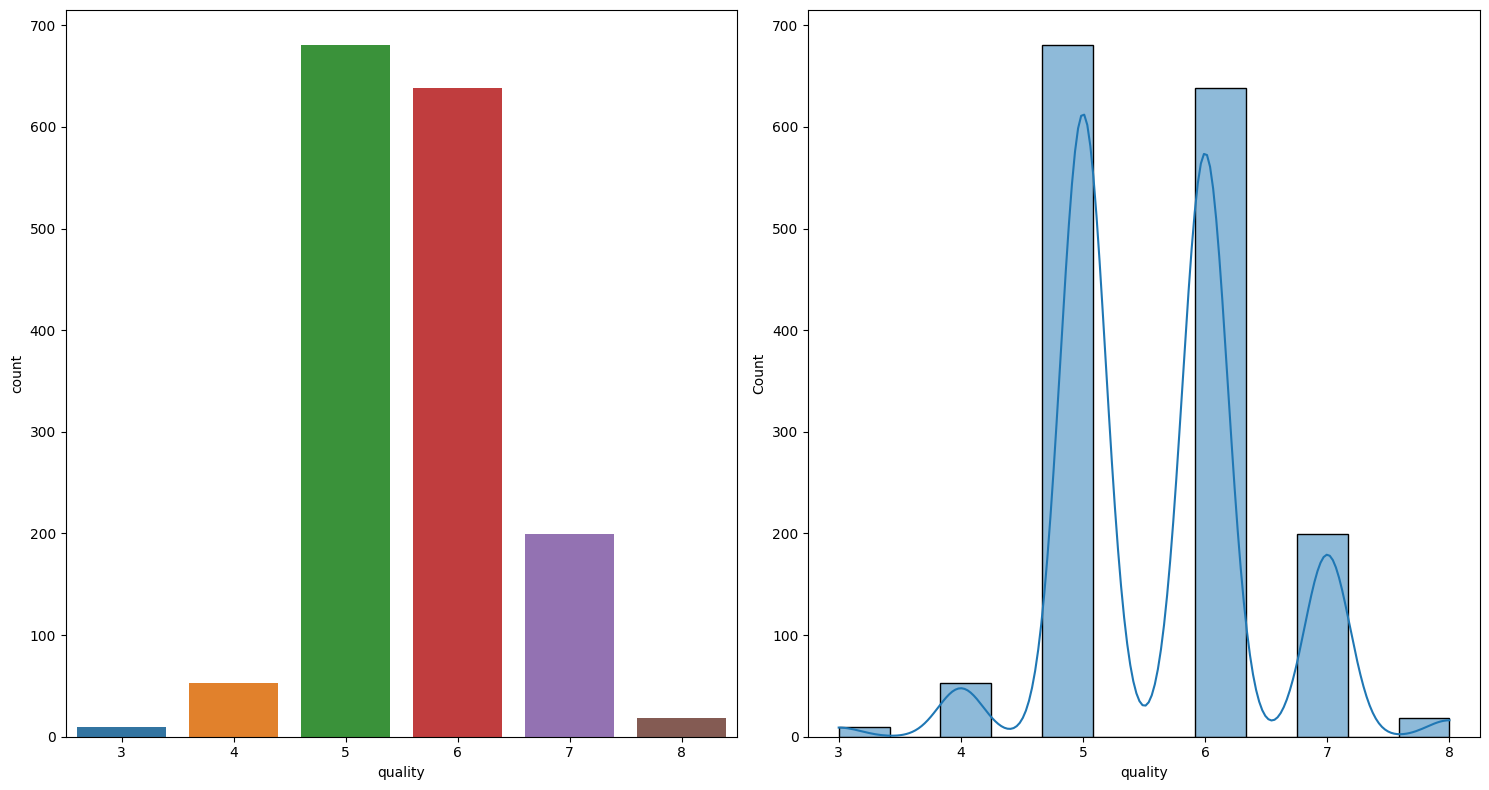

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.countplot(df, x = 'quality', ax = axes[0])
sns.histplot(df, x = 'quality', kde=True, bins='sturges' ,ax = axes[1])

plt.tight_layout()
plt.show()

## 其他特徵分佈

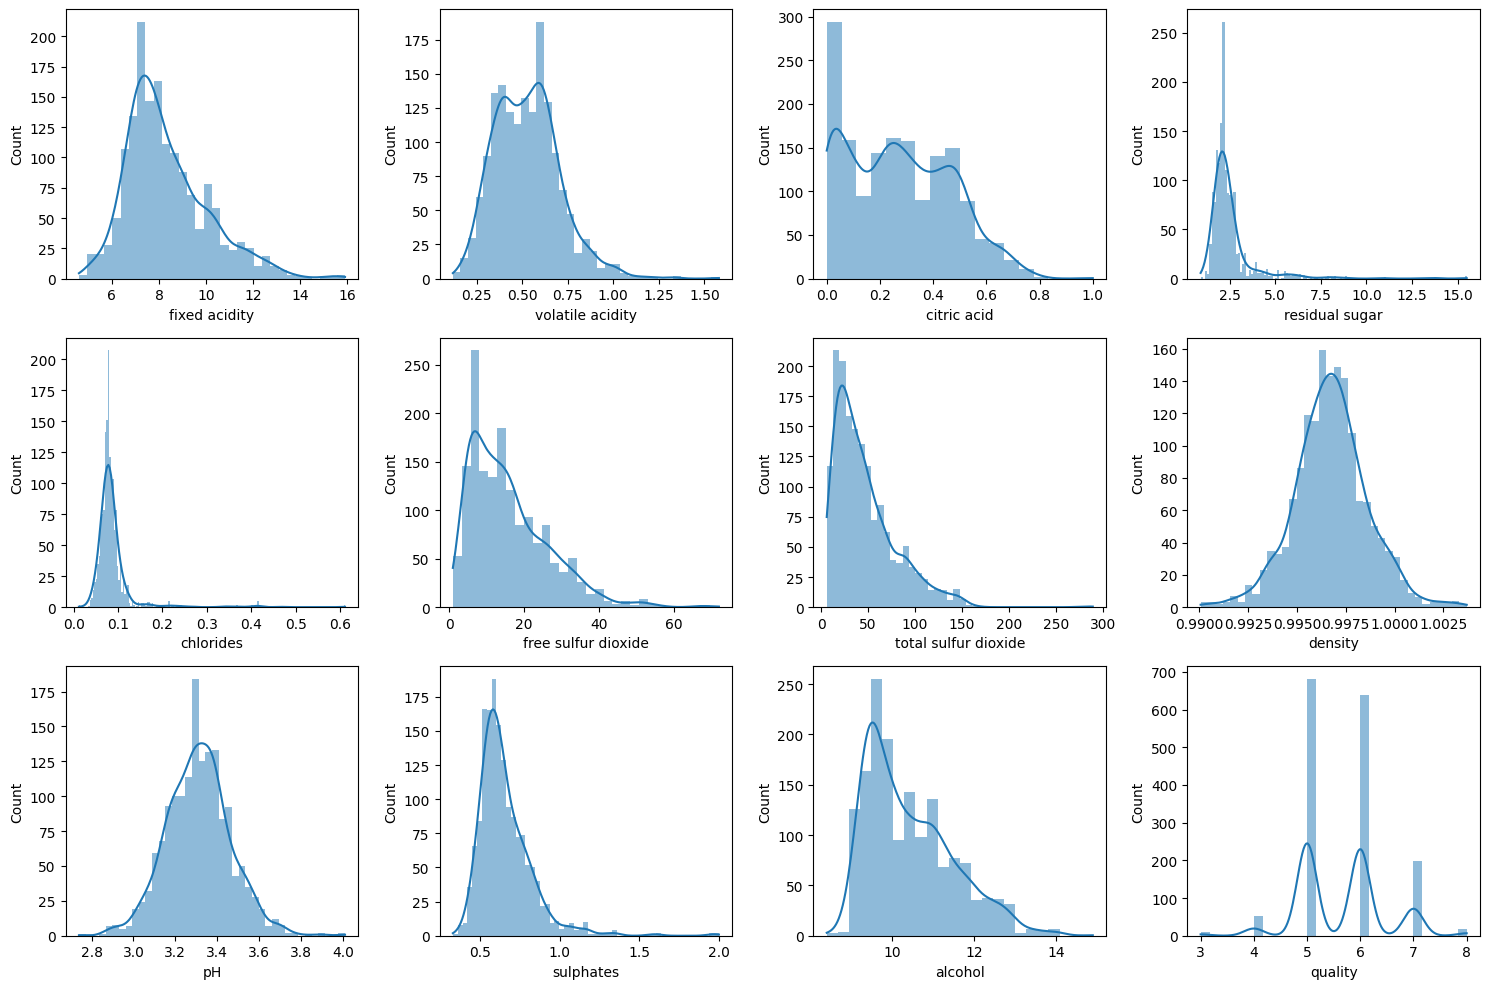

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
ax = axes.flatten()
for idx, val in enumerate(df.columns):
    sns.histplot(df, x = val, kde=True, edgecolor = None ,ax = ax[idx])
plt.tight_layout()
plt.show()

## 品質對其他特徵

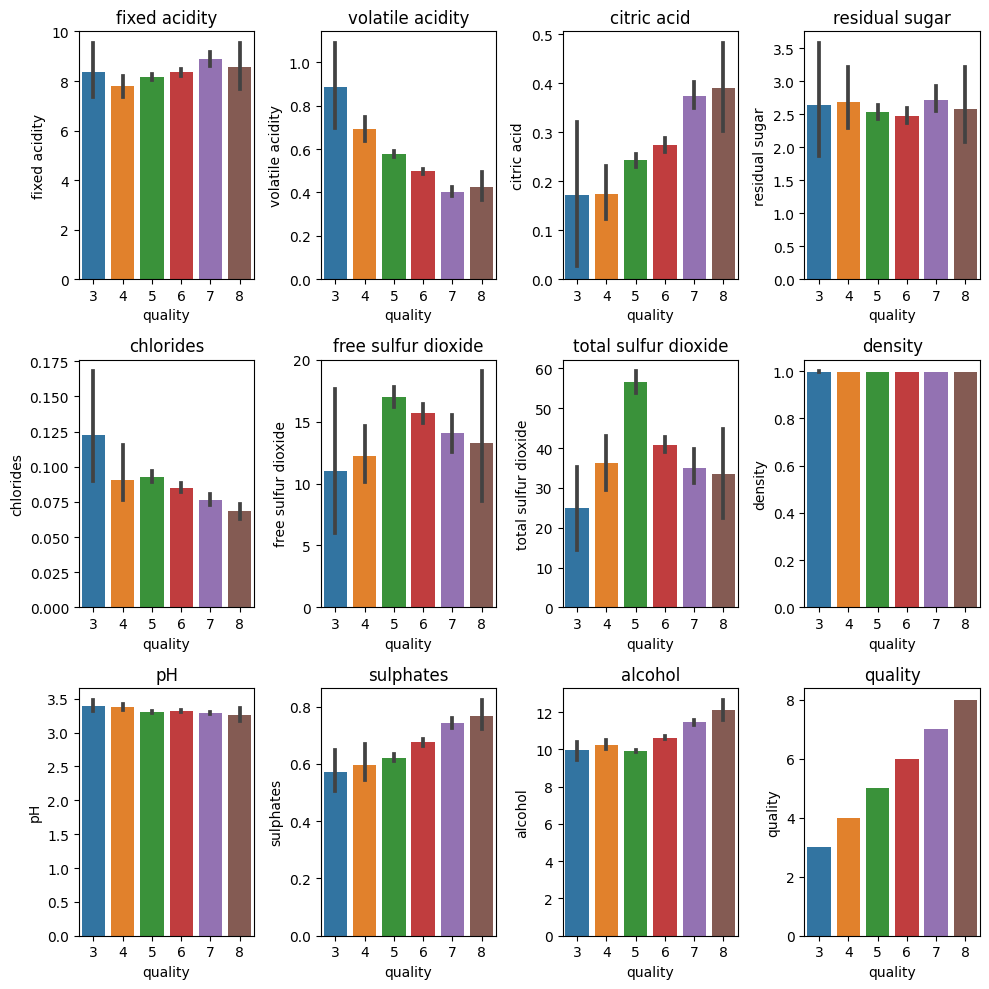

In [ ]:
# 灰色細條為誤差線
# fixed acidity、residual sugar、density、PH 對quality沒甚麼影響力
fig, axes = plt.subplots(3, 4, figsize=(10, 10))
ax = axes.flatten()
for idx, val in enumerate(df.columns):
    sns.barplot(data=df, x='quality', y=val, ax=ax[idx])
    ax[idx].set_title(val)
plt.tight_layout()
plt.show()

## 各項特徵箱型圖

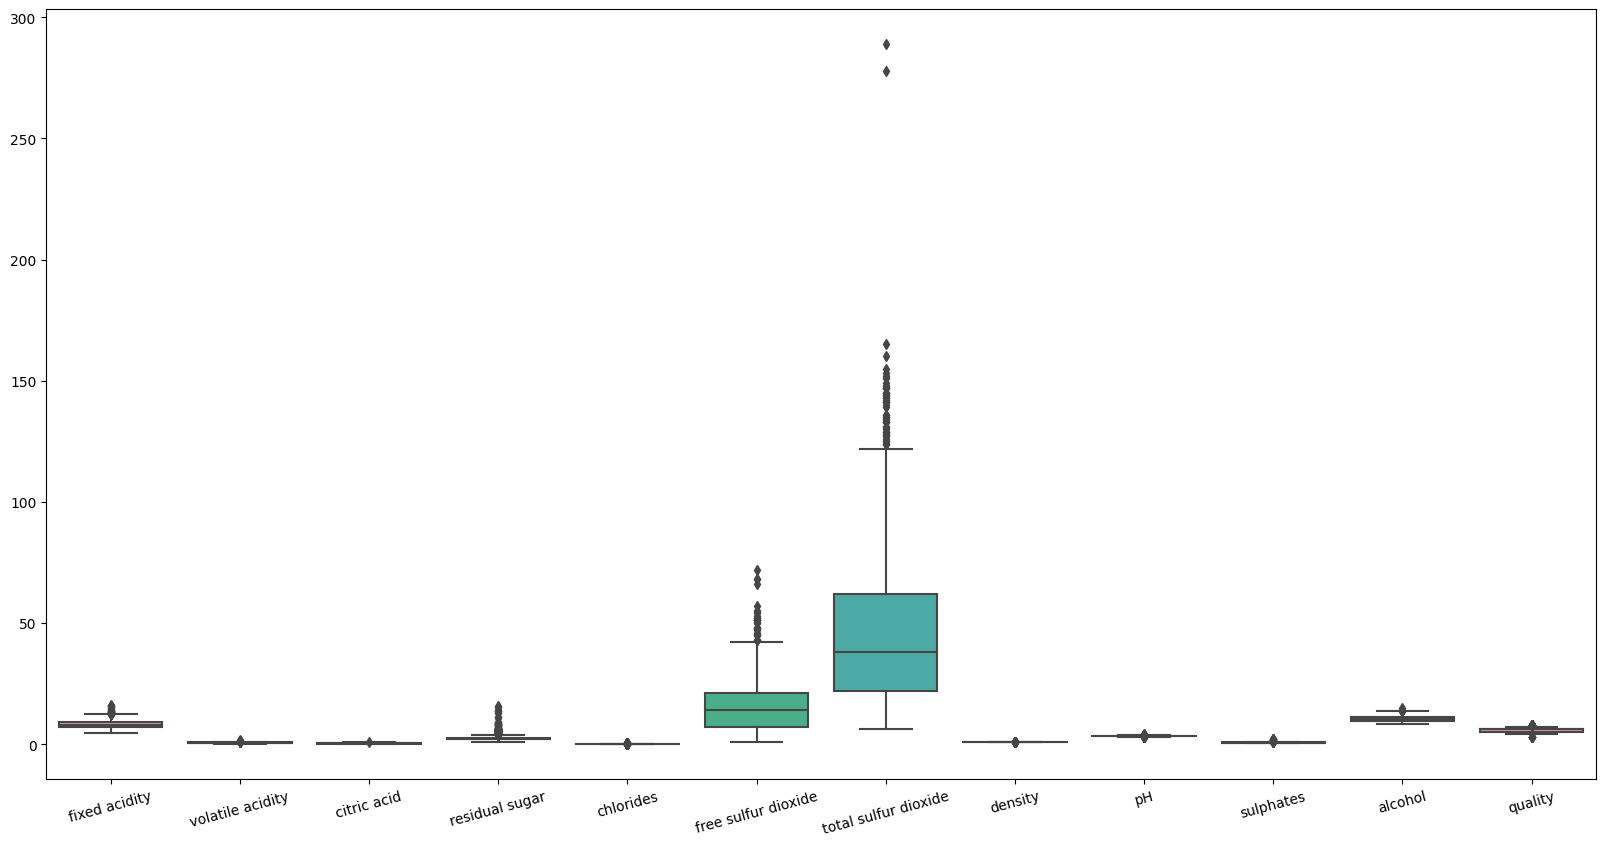

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(df)
plt.xticks(rotation = 15)
plt.show()

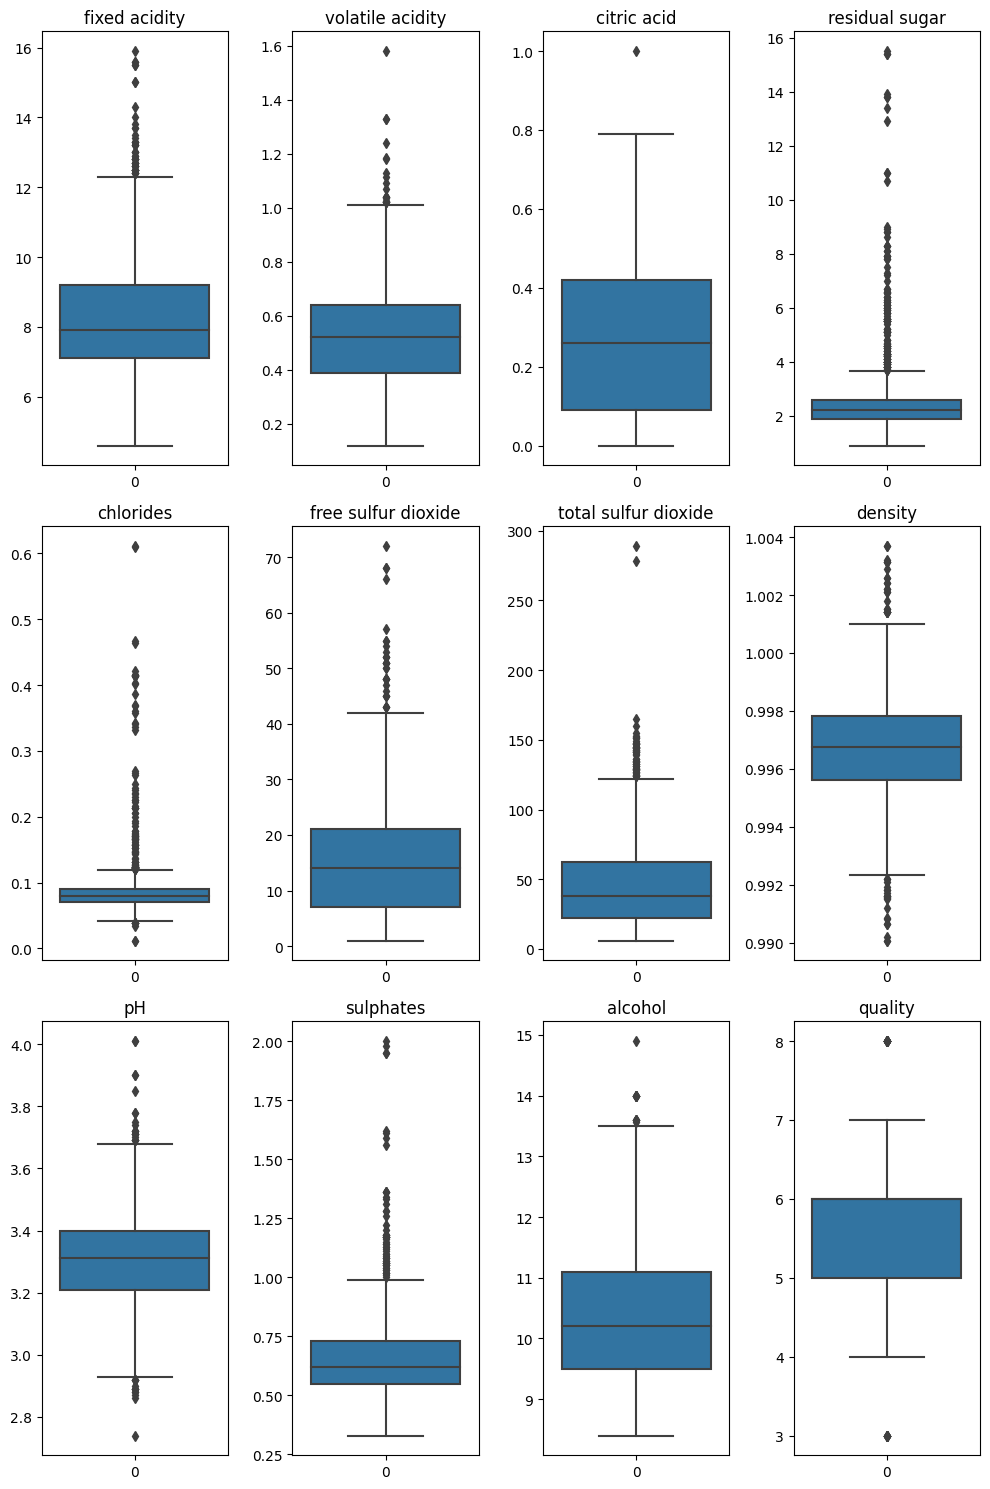

In [ ]:
fig, axes = plt.subplots(3, 4, figsize=(10, 15))
ax = axes.flatten()
for idx, val in enumerate(df.columns):
    sns.boxplot(df[val], ax = ax[idx])
    ax[idx].set_title(val)
plt.tight_layout()
plt.show()

## 相關性

In [ ]:
df.corr()['quality'].abs().sort_values()
# 前N影響力 ( > 0.2)
# 1. alcohol
# 2. volatile acidity
# 3. sulphates
# 4. citric acid

# free sulfur dioxide、residual sugar、PH 低影響力

residual sugar          0.013732
free sulfur dioxide     0.050656
pH                      0.057731
fixed acidity           0.124052
chlorides               0.128907
density                 0.174919
total sulfur dioxide    0.185100
citric acid             0.226373
sulphates               0.251397
volatile acidity        0.390558
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

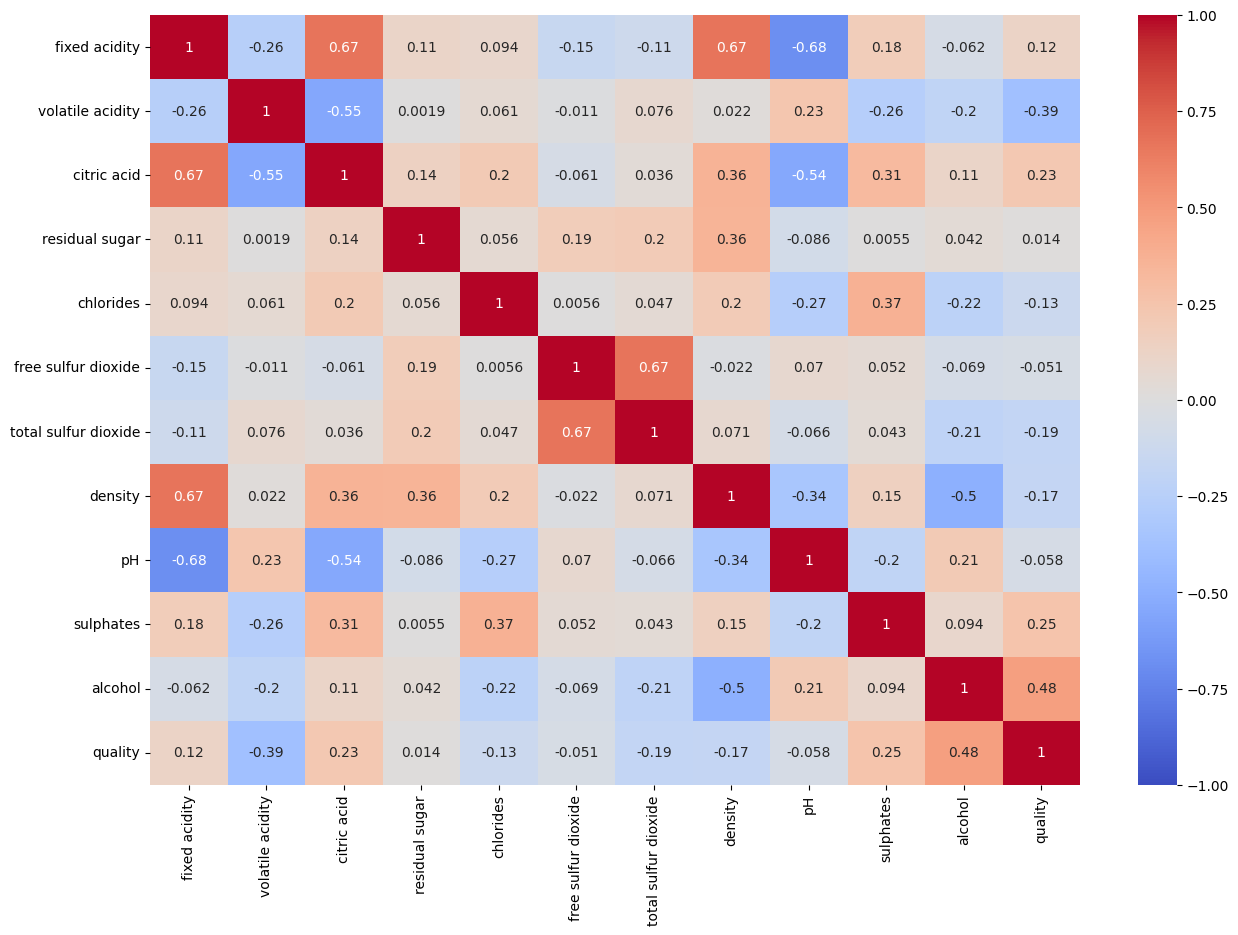

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = 'coolwarm', annot= True)
plt.show()

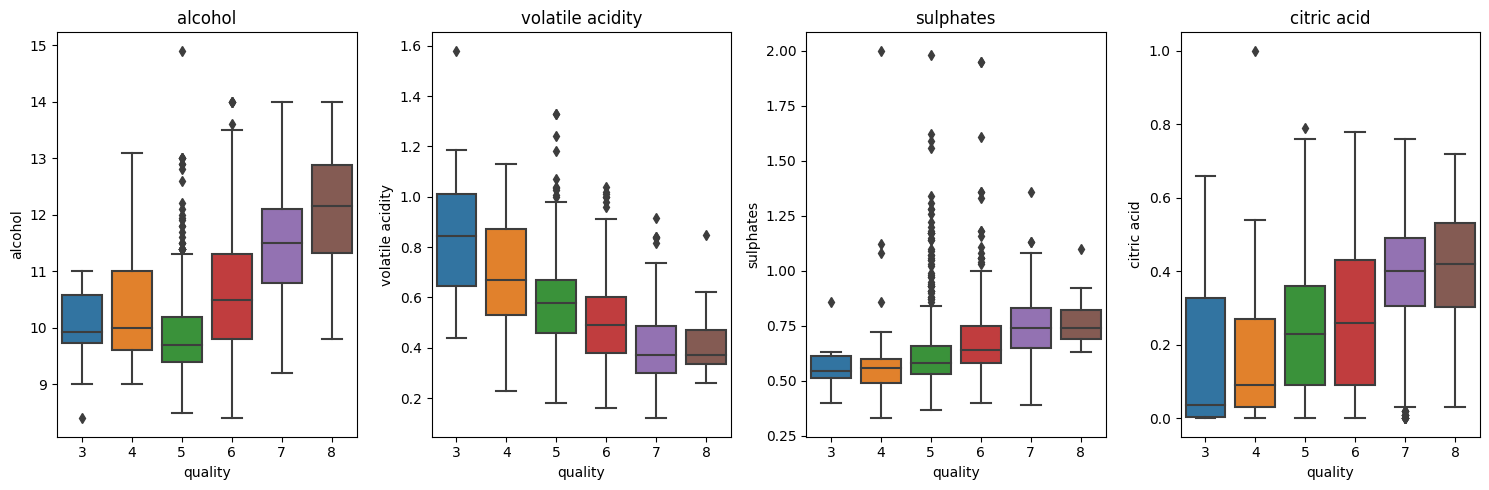

In [ ]:
lst = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid']
fig, axes = plt.subplots(1, 4, figsize=(15,5))
ax = axes.flatten()
for idx, val in enumerate(lst):
    sns.boxplot(df, x = 'quality', y = val, ax = ax[idx])
    ax[idx].set_title(val)
plt.tight_layout()
plt.show()

# 特徵優化

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## 資料清理

In [ ]:
df.isnull().any() # No missing values

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [ ]:
df.info() # 都是數值型資料

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## 特徵工程

### 品質2分法

In [3]:
df['quality'] = df['quality'].map(lambda x:1 if x > 6.5 else 0)

<Axes: >

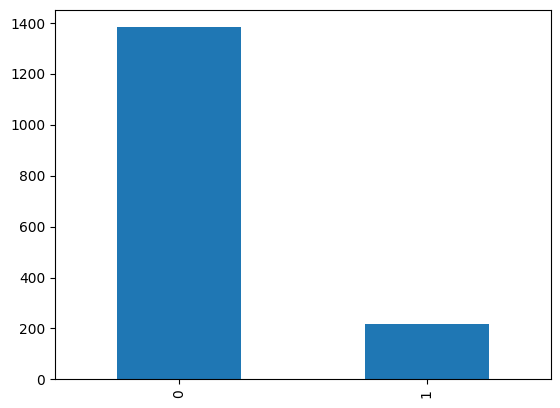

In [ ]:
df['quality'].value_counts().plot.bar() # bad 1382, good 217

### 新增特徵欄位

In [4]:
# 依據Santa Rosa article(http://srjcstaff.santarosa.edu/~jhenderson/SO2.pdf)，quality越高，游離二氧化硫濃度越高
df['mso2'] = df['free sulfur dioxide'] / (1 + 10 ** df['pH'] - 1.81)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,mso2
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.003400
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,0.015782
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,0.008247
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,0.011768
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,0.003400
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,0.011357
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0,0.011781
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0,0.011029
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,0.008615


<Axes: xlabel='quality', ylabel='mso2'>

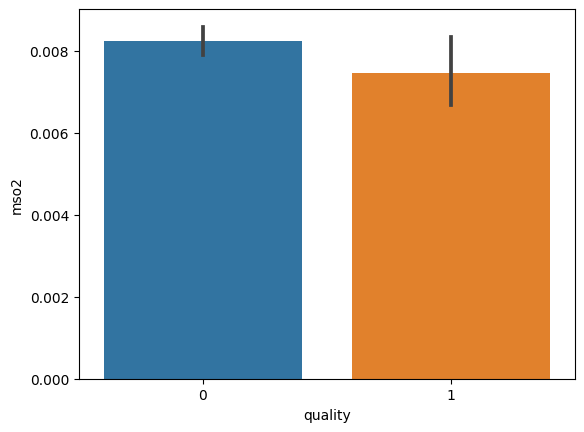

In [ ]:
sns.barplot(df, x='quality', y='mso2') # Q高 mso2也高

### 刪除特徵

In [5]:
df.corr()['quality'].abs().sort_values() # 決定不刪除

mso2                    0.042025
residual sugar          0.047779
pH                      0.057283
free sulfur dioxide     0.071747
chlorides               0.097308
fixed acidity           0.120061
total sulfur dioxide    0.139517
density                 0.150460
sulphates               0.199485
citric acid             0.214716
volatile acidity        0.270712
alcohol                 0.407315
quality                 1.000000
Name: quality, dtype: float64

### 標準化

In [6]:
# normalization，Stabdardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_columns = df.columns.difference(["quality"])
df[feature_columns] = scaler.fit_transform(df[feature_columns])

# 建立模型

In [7]:
df_train = df.copy()
df_train.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,mso2
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0,-0.741663
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0,1.203486
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0,0.019725
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0,0.572854
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0,-0.741663


## split X,y & train, test

In [8]:
from sklearn.model_selection import train_test_split
X = df_train.drop('quality', axis = 1)
y = df_train['quality']

In [9]:
# 訓練、測試
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [10]:
display(X_train.shape)
display(X_test.shape)

(1279, 12)

(320, 12)

In [11]:
display(y_test.value_counts())
display(y_train.value_counts())

0    273
1     47
Name: quality, dtype: int64

0    1109
1     170
Name: quality, dtype: int64

## 建模 & 交叉驗證

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve, validation_curve
from sklearn.metrics import precision_recall_fscore_support, classification_report, accuracy_score
import numpy as np

In [13]:
rfc = RandomForestClassifier(random_state=42)
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 5)
print(rfc_eval.mean())

rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

0.9046231617647059


## Feature importance

In [21]:
pd.DataFrame({'Feature':X_train.columns,'Importances': rfc.feature_importances_}).sort_values('Importances',ascending=False)

,Feature,Importances
10,alcohol,0.161357
9,sulphates,0.120345
1,volatile acidity,0.111005
7,density,0.081755
2,citric acid,0.076364
6,total sulfur dioxide,0.072223
4,chlorides,0.071577
11,mso2,0.070987
0,fixed acidity,0.063647
3,residual sugar,0.061541


In [ ]:
print(classification_report(y_test, pred_rfc)) # 1的F1成績不好
rfc_report = classification_report(y_test, pred_rfc, output_dict=True)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320



In [ ]:
log = LogisticRegression(random_state = 42, max_iter=3000)
scores = cross_val_score(log, X_train, y_train, cv=5, scoring='accuracy')
print(scores.mean())

log.fit(X_train, y_train)
predict_res = log.predict(X_test)

0.8835079656862745


In [ ]:
print(classification_report(y_test, predict_res)) # 1也很爛
log_report = classification_report(y_test, predict_res, output_dict=True)

              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320



## 超參數優化

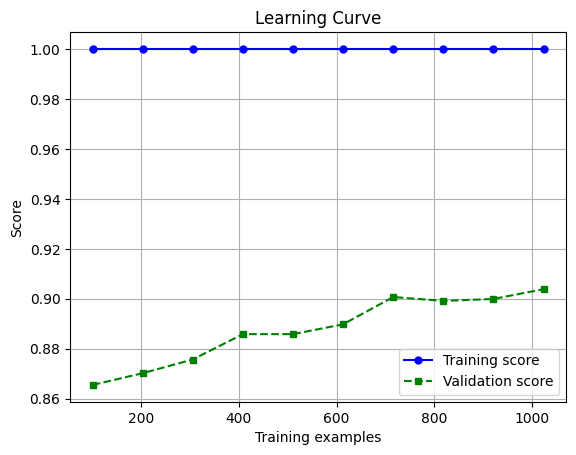

In [ ]:
rfc = RandomForestClassifier(random_state=42) # 700 +
train_sizes, train_scores, test_scores = learning_curve(rfc, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training score')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation score')

plt.title('Learning Curve')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

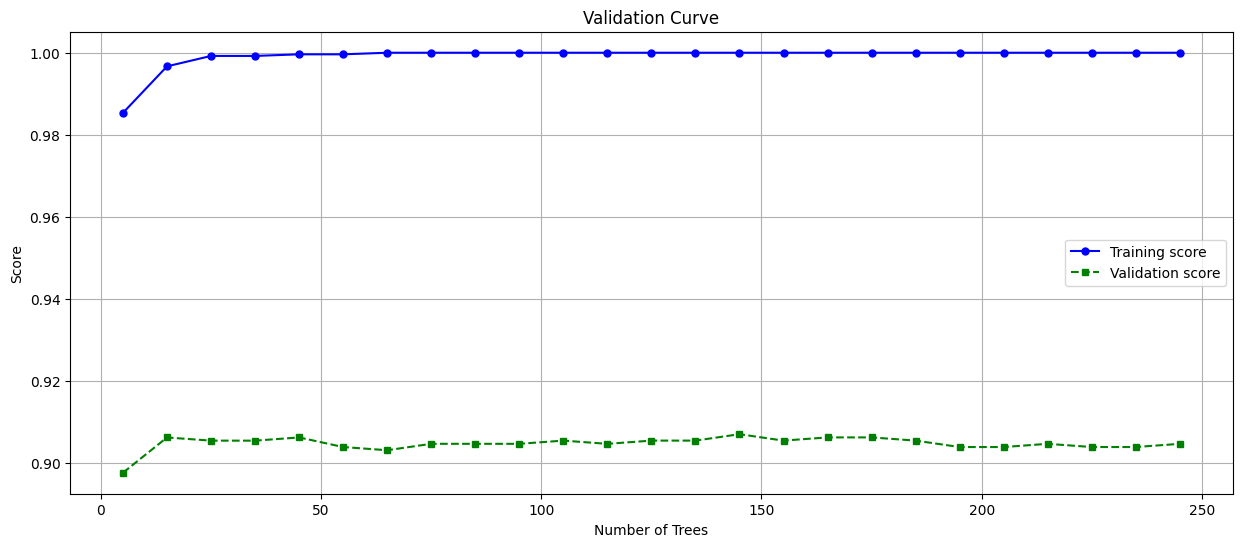

In [ ]:
param_range = np.arange(5, 251, 10) # 5 ~ 250
rfc = RandomForestClassifier(random_state=42)
train_scores, test_scores = validation_curve(rfc, X_train, y_train, param_name="n_estimators", param_range=param_range, cv=5)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(15, 6))
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training score')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation score')

plt.title('Validation Curve')
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.xticks(np.arange(0, 251, 50))
# plt.ylim(0.9, 0.92)
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
rfc = RandomForestClassifier(random_state=42)
Parameters = {
  'max_depth' : np.arange(5, 31, 5),
  'n_estimators': np.arange(10, 51, 10)
}
GSCV = GridSearchCV(rfc, Parameters, cv=5)
GSCV.fit(X_train, y_train)

In [ ]:
# 最佳超參數
best_rfc = GSCV.best_estimator_
predict_res = best_rfc.predict(X_test)
print(GSCV.best_params_)
print(classification_report(y_test, predict_res))
rfc_opt_report = classification_report(y_test, predict_res, output_dict=True)

{'max_depth': 20, 'n_estimators': 10}
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       273
           1       0.76      0.55      0.64        47

    accuracy                           0.91       320
   macro avg       0.85      0.76      0.80       320
weighted avg       0.90      0.91      0.90       320



### 整理目前模型結果

In [ ]:
def report_res(report:dict, name:str):
  model_result = {
            'f1-score_0': round(report['0']['f1-score'], 2),
            'f1-score_1': round(report['1']['f1-score'], 2),
            'Accuracy' : round(report['accuracy'], 2)
           }
  return pd.DataFrame([model_result], index=[name])

In [ ]:
rfc = report_res(rfc_report, 'rfc')
log = report_res(log_report, 'log')
rfc_opt = report_res(rfc_opt_report, 'rfc_opt')
res = pd.concat([rfc,log,rfc_opt])
res

,f1-score_0,f1-score_1,Accuracy
rfc,0.94,0.60,0.90
log,0.92,0.38,0.87
rfc_opt,0.95,0.64,0.91


## 其他模型

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [ ]:
DTC = DecisionTreeClassifier(random_state = 42)
scores = cross_val_score(DTC, X_train, y_train, cv=5, scoring='accuracy')
print('CVS',scores.mean())

DTC.fit(X_train, y_train)
predict_res = DTC.predict(X_test)
print(classification_report(y_test, predict_res))
DTC_report = classification_report(y_test, predict_res, output_dict=True)

CVS 0.8686580882352942
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       273
           1       0.61      0.60      0.60        47

    accuracy                           0.88       320
   macro avg       0.77      0.76      0.77       320
weighted avg       0.88      0.88      0.88       320



In [ ]:
SVC = SVC(random_state = 42)
scores = cross_val_score(SVC, X_train, y_train, cv=5, scoring='accuracy')
print('CVS',scores.mean())

SVC.fit(X_train, y_train)
predict_res = SVC.predict(X_test)
print(classification_report(y_test, predict_res))
SVC_report = classification_report(y_test, predict_res, output_dict=True)

CVS 0.8858486519607844
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       273
           1       0.73      0.23      0.35        47

    accuracy                           0.88       320
   macro avg       0.81      0.61      0.64       320
weighted avg       0.86      0.88      0.85       320



In [ ]:
XGB = xgb.XGBClassifier(random_state = 42)
scores = cross_val_score(XGB, X_train, y_train, cv=5, scoring='accuracy')
print('CVS',scores.mean())

XGB.fit(X_train, y_train)
predict_res = XGB.predict(X_test)
print(classification_report(y_test, predict_res))
XGB_report = classification_report(y_test, predict_res, output_dict=True)

CVS 0.8960232843137256
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       273
           1       0.81      0.62      0.70        47

    accuracy                           0.92       320
   macro avg       0.87      0.80      0.83       320
weighted avg       0.92      0.92      0.92       320



In [ ]:
svc = report_res(SVC_report, 'SVC')
dtc = report_res(DTC_report, 'DTC')
xgb = report_res(XGB_report, 'XGB')
result = pd.concat([res,svc,dtc,xgb])
result.sort_values('f1-score_1',ascending=False)

,f1-score_0,f1-score_1,Accuracy
XGB,0.96,0.70,0.92
rfc_opt,0.95,0.64,0.91
rfc,0.94,0.60,0.90
DTC,0.93,0.60,0.88
log,0.92,0.38,0.87
SVC,0.93,0.35,0.88


## DeepLearning

In [ ]:
import torch

In [ ]:
# 分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
print(X_train.shape)
print(X_val.shape)

(1151, 12)
(128, 12)


In [ ]:
# 創建模型架構
class Model(torch.nn.Module):
    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.hidden1 = torch.nn.Linear(input_size, 64)
        self.hidden2 = torch.nn.Linear(64, 32)
        self.predict = torch.nn.Linear(32, output_size)

    def forward(self, x):
        output1 = torch.relu(self.hidden1(x))
        output2 = torch.relu(self.hidden2(output1))
        output = torch.sigmoid(self.predict(output2))
        return output

In [ ]:
# 模型、優化器初始化
model = Model(X_test.shape[1], 1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.0) # 模型參數優化器
loss_func = torch.nn.BCELoss()

In [ ]:
# 資料格式轉成torch專用格式
x_data = torch.tensor(X_train.values, dtype=torch.float32)
y_data = torch.tensor(np.expand_dims(y_train, axis=1), dtype=torch.float32)

x_val_data = torch.tensor(X_val.values, dtype=torch.float32)
y_val_data = torch.tensor(np.expand_dims(y_val, axis=1), dtype=torch.float32)

x_test_data = torch.tensor(X_test.values, dtype=torch.float32)
y_test_data = torch.tensor(np.expand_dims(y_test, axis=1), dtype=torch.float32)

In [ ]:
batch_size = 32
num_epochs = 200
training_losses = []
val_losses = []

for epoch in range(num_epochs):
    for i in range(0, len(x_data), batch_size):
        prediction = model(x_data[i:i+batch_size])
        loss = loss_func(prediction, y_data[i:i+batch_size])

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    loss = loss_func(model(x_data), y_data)
    training_losses.append(float(loss))

    y_pred = model(x_val_data)
    val_loss = loss_func(y_pred, y_val_data)
    accuracy = accuracy_score(y_val_data, np.where(y_pred >= 0.5, 1, 0))
    print("Epoch {}, training loss: {:.4f}, test loss: {:.4f}, test accuracy: {:.4f}".format(epoch+1, loss, val_loss, accuracy))
    val_losses.append(float(val_loss))

Epoch 1, training loss: 0.4688, test loss: 0.4671, test accuracy: 0.8672
Epoch 2, training loss: 0.3884, test loss: 0.3833, test accuracy: 0.8672
Epoch 3, training loss: 0.3561, test loss: 0.3489, test accuracy: 0.8672
Epoch 4, training loss: 0.3341, test loss: 0.3261, test accuracy: 0.8672
Epoch 5, training loss: 0.3184, test loss: 0.3103, test accuracy: 0.8672
Epoch 6, training loss: 0.3069, test loss: 0.2988, test accuracy: 0.8672
Epoch 7, training loss: 0.2979, test loss: 0.2903, test accuracy: 0.8672
Epoch 8, training loss: 0.2905, test loss: 0.2838, test accuracy: 0.8672
Epoch 9, training loss: 0.2844, test loss: 0.2786, test accuracy: 0.8672
Epoch 10, training loss: 0.2794, test loss: 0.2746, test accuracy: 0.8672
Epoch 11, training loss: 0.2753, test loss: 0.2714, test accuracy: 0.8672
Epoch 12, training loss: 0.2717, test loss: 0.2688, test accuracy: 0.8750
Epoch 13, training loss: 0.2686, test loss: 0.2666, test accuracy: 0.8828
Epoch 14, training loss: 0.2660, test loss: 0.2

Text(0, 0.5, 'loss')

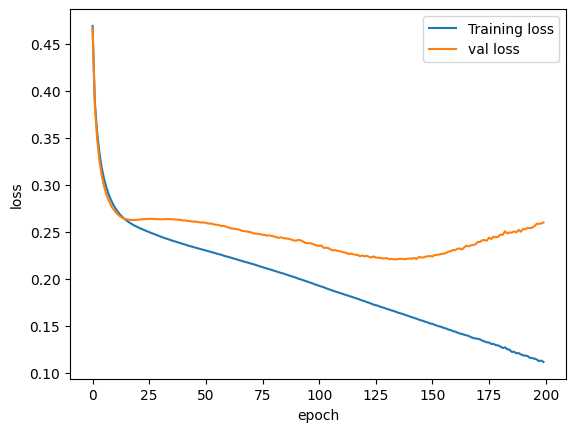

In [ ]:
plt.plot(training_losses)
plt.plot(val_losses)
plt.legend(("Training loss", "val loss"))
plt.xlabel("epoch")
plt.ylabel("loss")

In [ ]:
y_pred = model(x_test_data)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test, y_pred))
pytorch_report = classification_report(y_test, y_pred, output_dict=True)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.71      0.53      0.61        47

    accuracy                           0.90       320
   macro avg       0.82      0.75      0.78       320
weighted avg       0.89      0.90      0.89       320



In [ ]:
pytorch = report_res(pytorch_report, 'Pytorch')
Final_result = pd.concat([result,pytorch])
Final_result.sort_values('f1-score_1',ascending=False)

,f1-score_0,f1-score_1,Accuracy
XGB,0.96,0.70,0.92
rfc_opt,0.95,0.64,0.91
Pytorch,0.94,0.61,0.90
rfc,0.94,0.60,0.90
DTC,0.93,0.60,0.88
log,0.92,0.38,0.87
SVC,0.93,0.35,0.88
